In [2]:
def head(X: list, n = 5) -> list:
    """
    return `n` (default is 5) first rows of a 2D list
    ### Parameters
    `X` : The 2D list
    `n` : number of first rows
    ### Example
    ```python
    >>> X = [[1,2], [3,4], [5,6]]
    >>> print(head(X))
    [[1,2],
     [3,4],
     [5,6]]
    >>> print(head(X,2))
    [[1,2],
     [3,4]]
    ```
    """
    return X[:n]

def tail(X: list, n = 5) -> list:
    """
    return `n` (default is 5) last rows of a 2D list
    ### Parameters
    `X` : The 2D list
    `n` : number of last rows
    ### Example
    ```python
    >>> X = [[1,2], [3,4], [5,6]]
    >>> print(tail(X))
    [[1,2],
     [3,4],
     [5,6]]
    >>> print(tail(X,2))
    [[3,4],
     [5,6]]
    ```
    """
    return X[(-n):]

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import seaborn as sns

In [4]:
purchaseData = pd.read_csv('Purchase_Logistic.csv')

X = purchaseData.iloc[:, [2, 3]]
print(X.head())
Y = purchaseData.iloc[:, 4]
print("Size of X =", X.size)
print("Size of Y =", Y.size)
print(Y.head())
Xtrain, Xtest, Ytrain, Ytest \
= train_test_split(X, Y, test_size = 0.25, random_state = 0) 

   Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000
Size of X = 800
Size of Y = 400
0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64


              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



<Axes: >

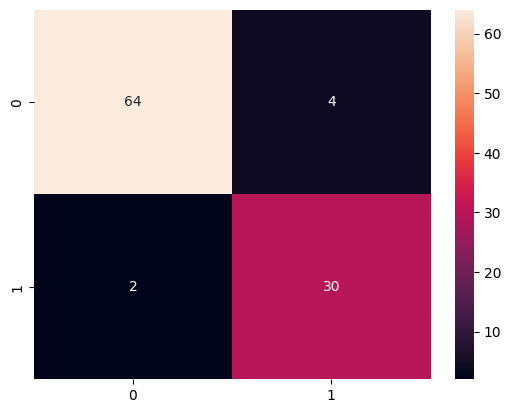

In [7]:
cf = tree.DecisionTreeClassifier(random_state=23, max_depth=3)
# max_depth is no. of levels you WANT to to go to, so it will check till level 3 only
# random_state is the seed value for randomisation
cf.fit(Xtrain,Ytrain)
Ypred = cf.predict(Xtest)
cmat = confusion_matrix(Ytest,Ypred)
print(classification_report(Ytest,Ypred))
sns.heatmap(data=cmat, annot=True)

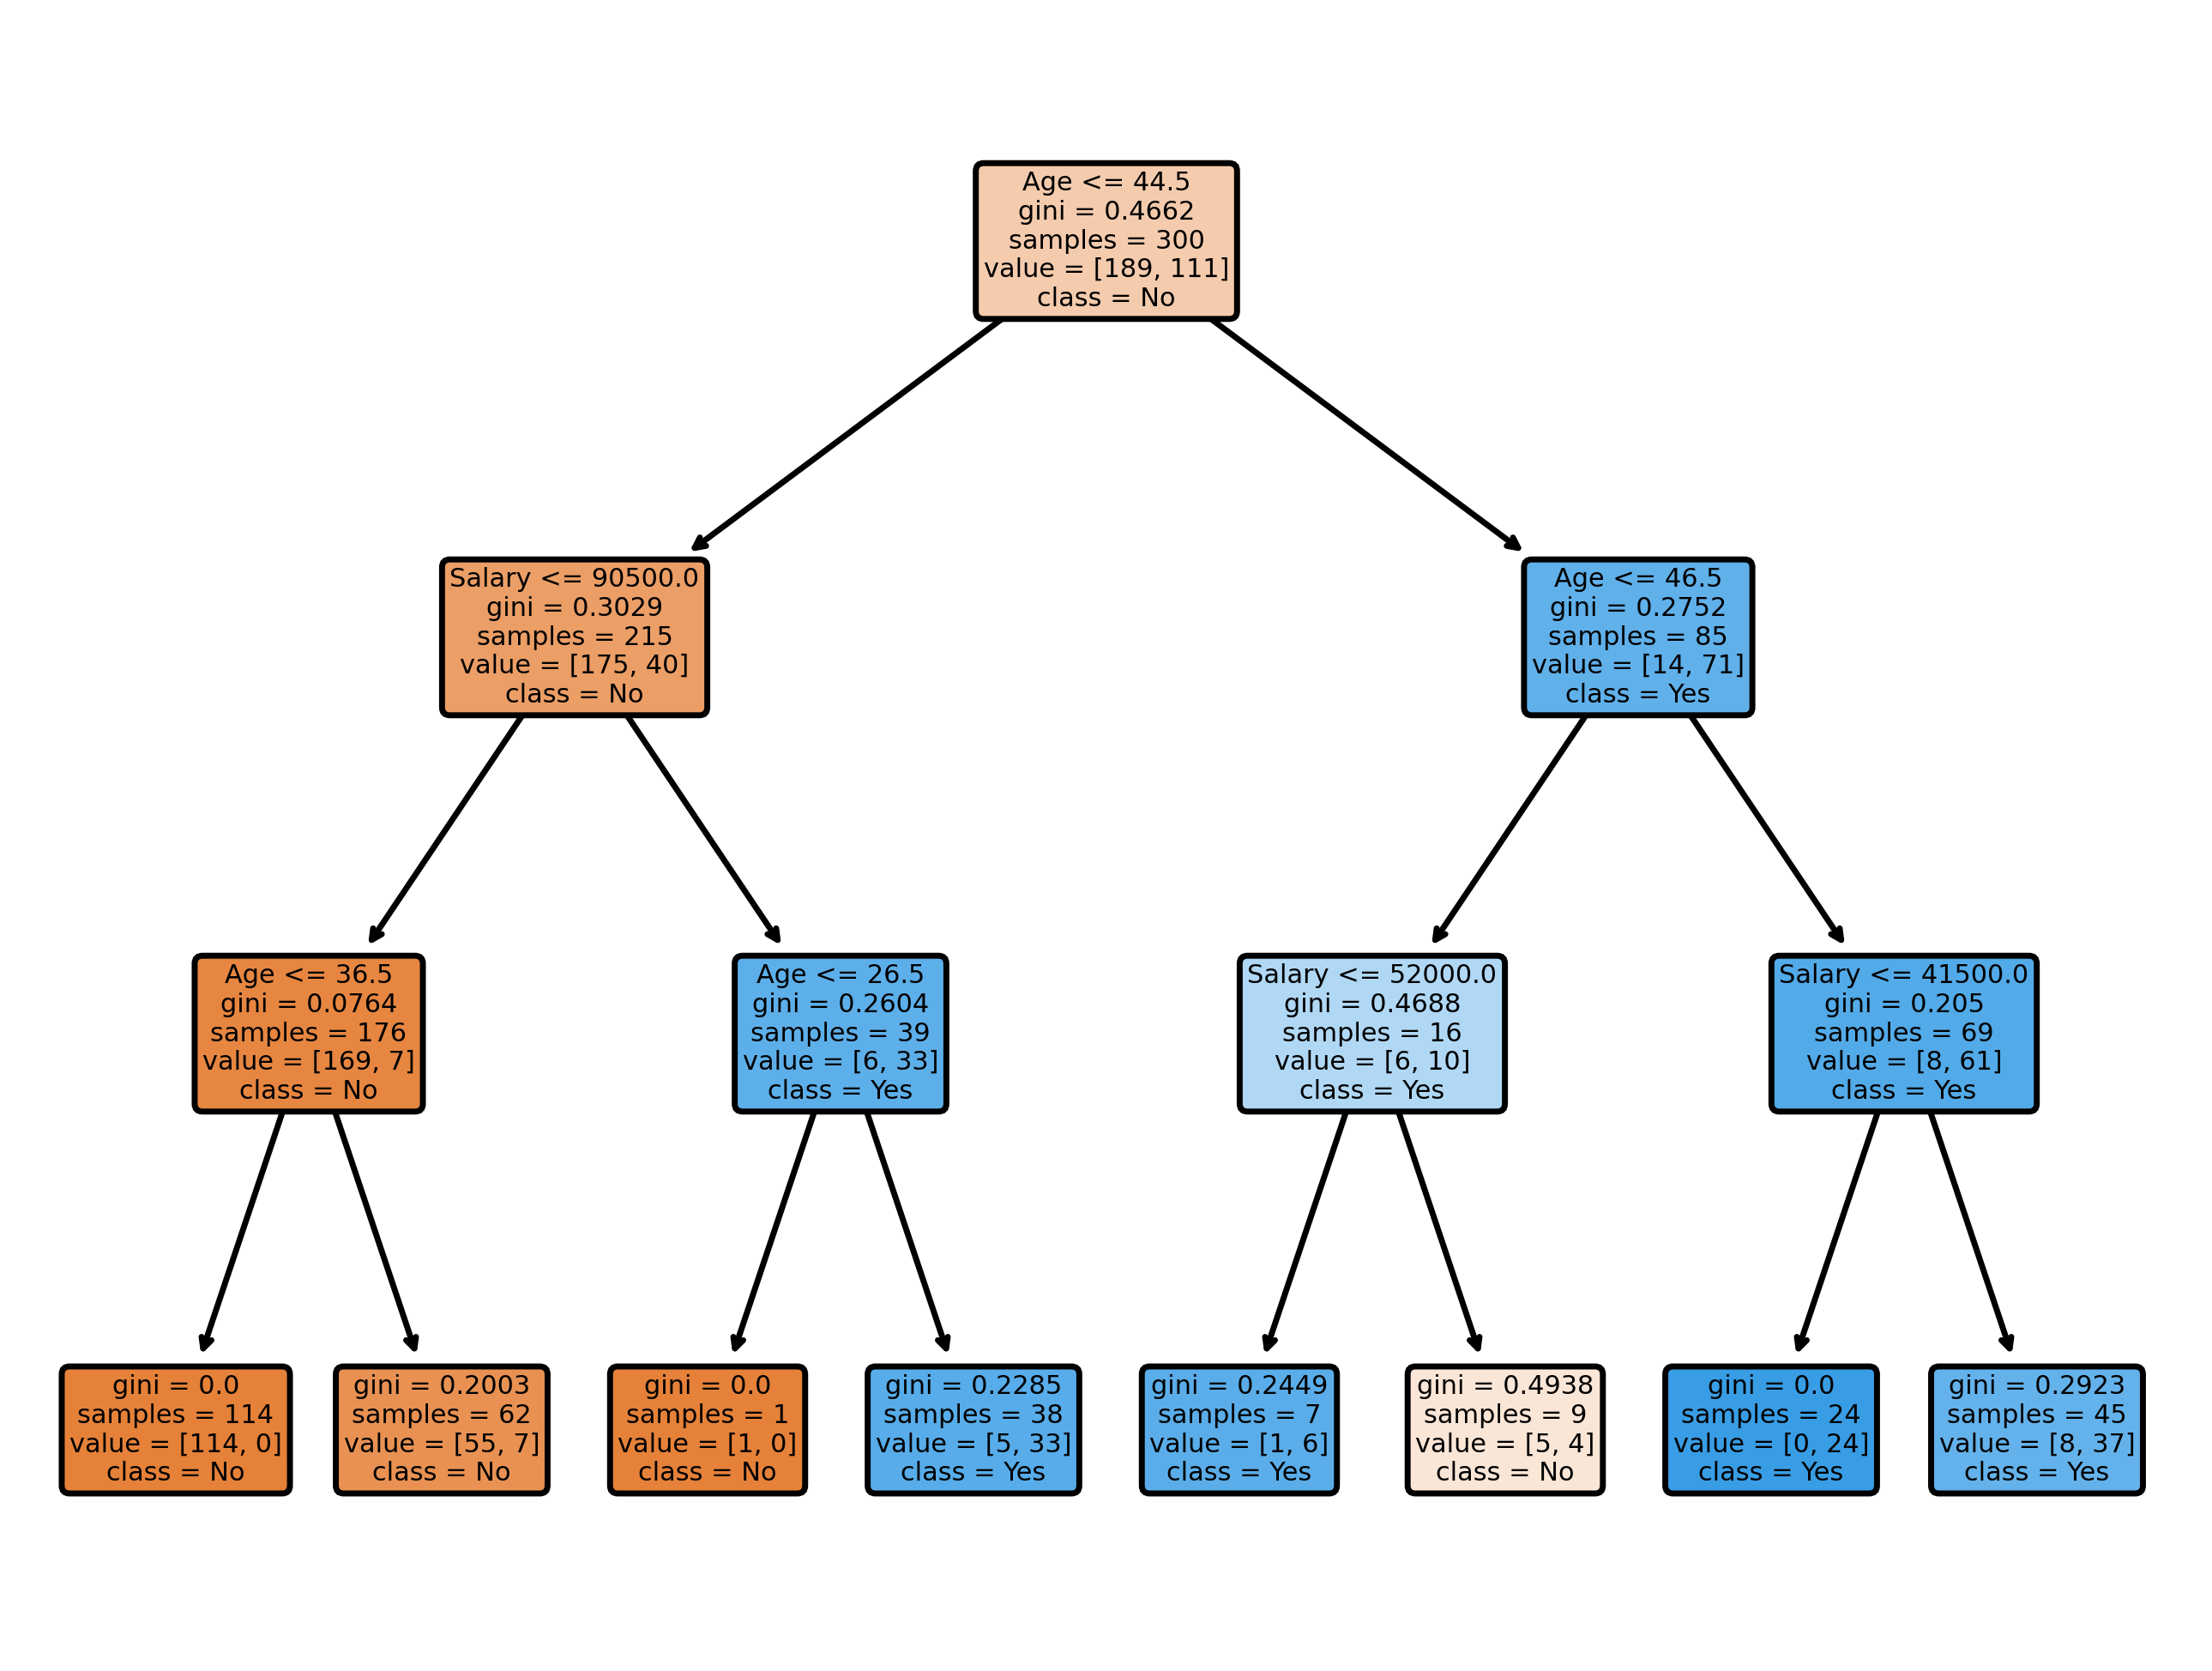

In [5]:
plt.figure(dpi=500)
decPlot = tree.plot_tree(decision_tree=cf, feature_names = ["Age", "Salary"], 
                     class_names =["No", "Yes"] , filled = True , precision = 4, rounded = True)

In [6]:
# LAST LEVEL has gini != 0, as we have restricted it to only 3 level deep classification in the tree

text_representation = tree.export_text(cf,  feature_names = ["Age","Salary"])
print(text_representation)

|--- Age <= 44.50
|   |--- Salary <= 90500.00
|   |   |--- Age <= 36.50
|   |   |   |--- class: 0
|   |   |--- Age >  36.50
|   |   |   |--- class: 0
|   |--- Salary >  90500.00
|   |   |--- Age <= 26.50
|   |   |   |--- class: 0
|   |   |--- Age >  26.50
|   |   |   |--- class: 1
|--- Age >  44.50
|   |--- Age <= 46.50
|   |   |--- Salary <= 52000.00
|   |   |   |--- class: 1
|   |   |--- Salary >  52000.00
|   |   |   |--- class: 0
|   |--- Age >  46.50
|   |   |--- Salary <= 41500.00
|   |   |   |--- class: 1
|   |   |--- Salary >  41500.00
|   |   |   |--- class: 1

